# Exmaple with MPG Dataset

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

32768/30286 [================================] - 0s 11us/step


In [4]:
column_names = ['MPG', 'Cyclinders', 'Displacement', 'Housepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

In [5]:
raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values="?", comment='\t', sep=' ', skipinitialspace=True)

In [6]:
dataset = raw_dataset.copy()

In [7]:
dataset.head()

,MPG,Cyclinders,Displacement,Housepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
dataset.isna().sum()

MPG             0
Cyclinders      0
Displacement    0
Housepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.isna().sum()

MPG             0
Cyclinders      0
Displacement    0
Housepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [13]:
dataset.describe()

,MPG,Cyclinders,Displacement,Housepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [17]:
origin = dataset.pop('Origin')

In [18]:
dataset['USA'] = (origin==1) * 1.0
dataset['Europe'] = (origin==2) * 1.0
dataset['Japan'] = (origin==3) * 1.0
dataset.tail()

,MPG,Cyclinders,Displacement,Housepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


Training set: Test set = 8:2

In [19]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [20]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [26]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cyclinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Housepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [27]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [28]:
normd_train_data = norm(train_dataset)
normd_test_data = norm(test_dataset)

In [29]:
print(normd_train_data.shape, train_labels.shape)
print(normd_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [30]:
train_db = tf.data.Dataset.from_tensor_slices((normd_train_data.values, train_labels))
train_db = train_db.shuffle(100).batch(32)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import ipympl

ModuleNotFoundError: No module named 'ipympl'

In [72]:
conda install -c conda-forge ipympl7

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Users\shelb\Anaconda3

  added / updated specs:
    - ipympl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_1         3.0 MB  conda-forge
    ipympl-0.3.1               |             py_0         669 KB  conda-forge
    matplotlib-base-3.1.1      |   py37h2852a4a_1         6.6 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        10.2 MB

The following NEW packages will be INSTALLED:

  ipympl             conda-forge/noarch::ipympl-0.3.1-py_0
  matplotlib-base    conda-forge/win-64::matplotlib-base-3.1.1-py37h2852a4a_1

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.7.12-py37_1




matplotlib-base-3.1. | 6.6 MB   

WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename D:\Users\shelb\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf.  Please remove this file manually (you may need to reboot to free file handles)


In [73]:
%matplotlib notebook

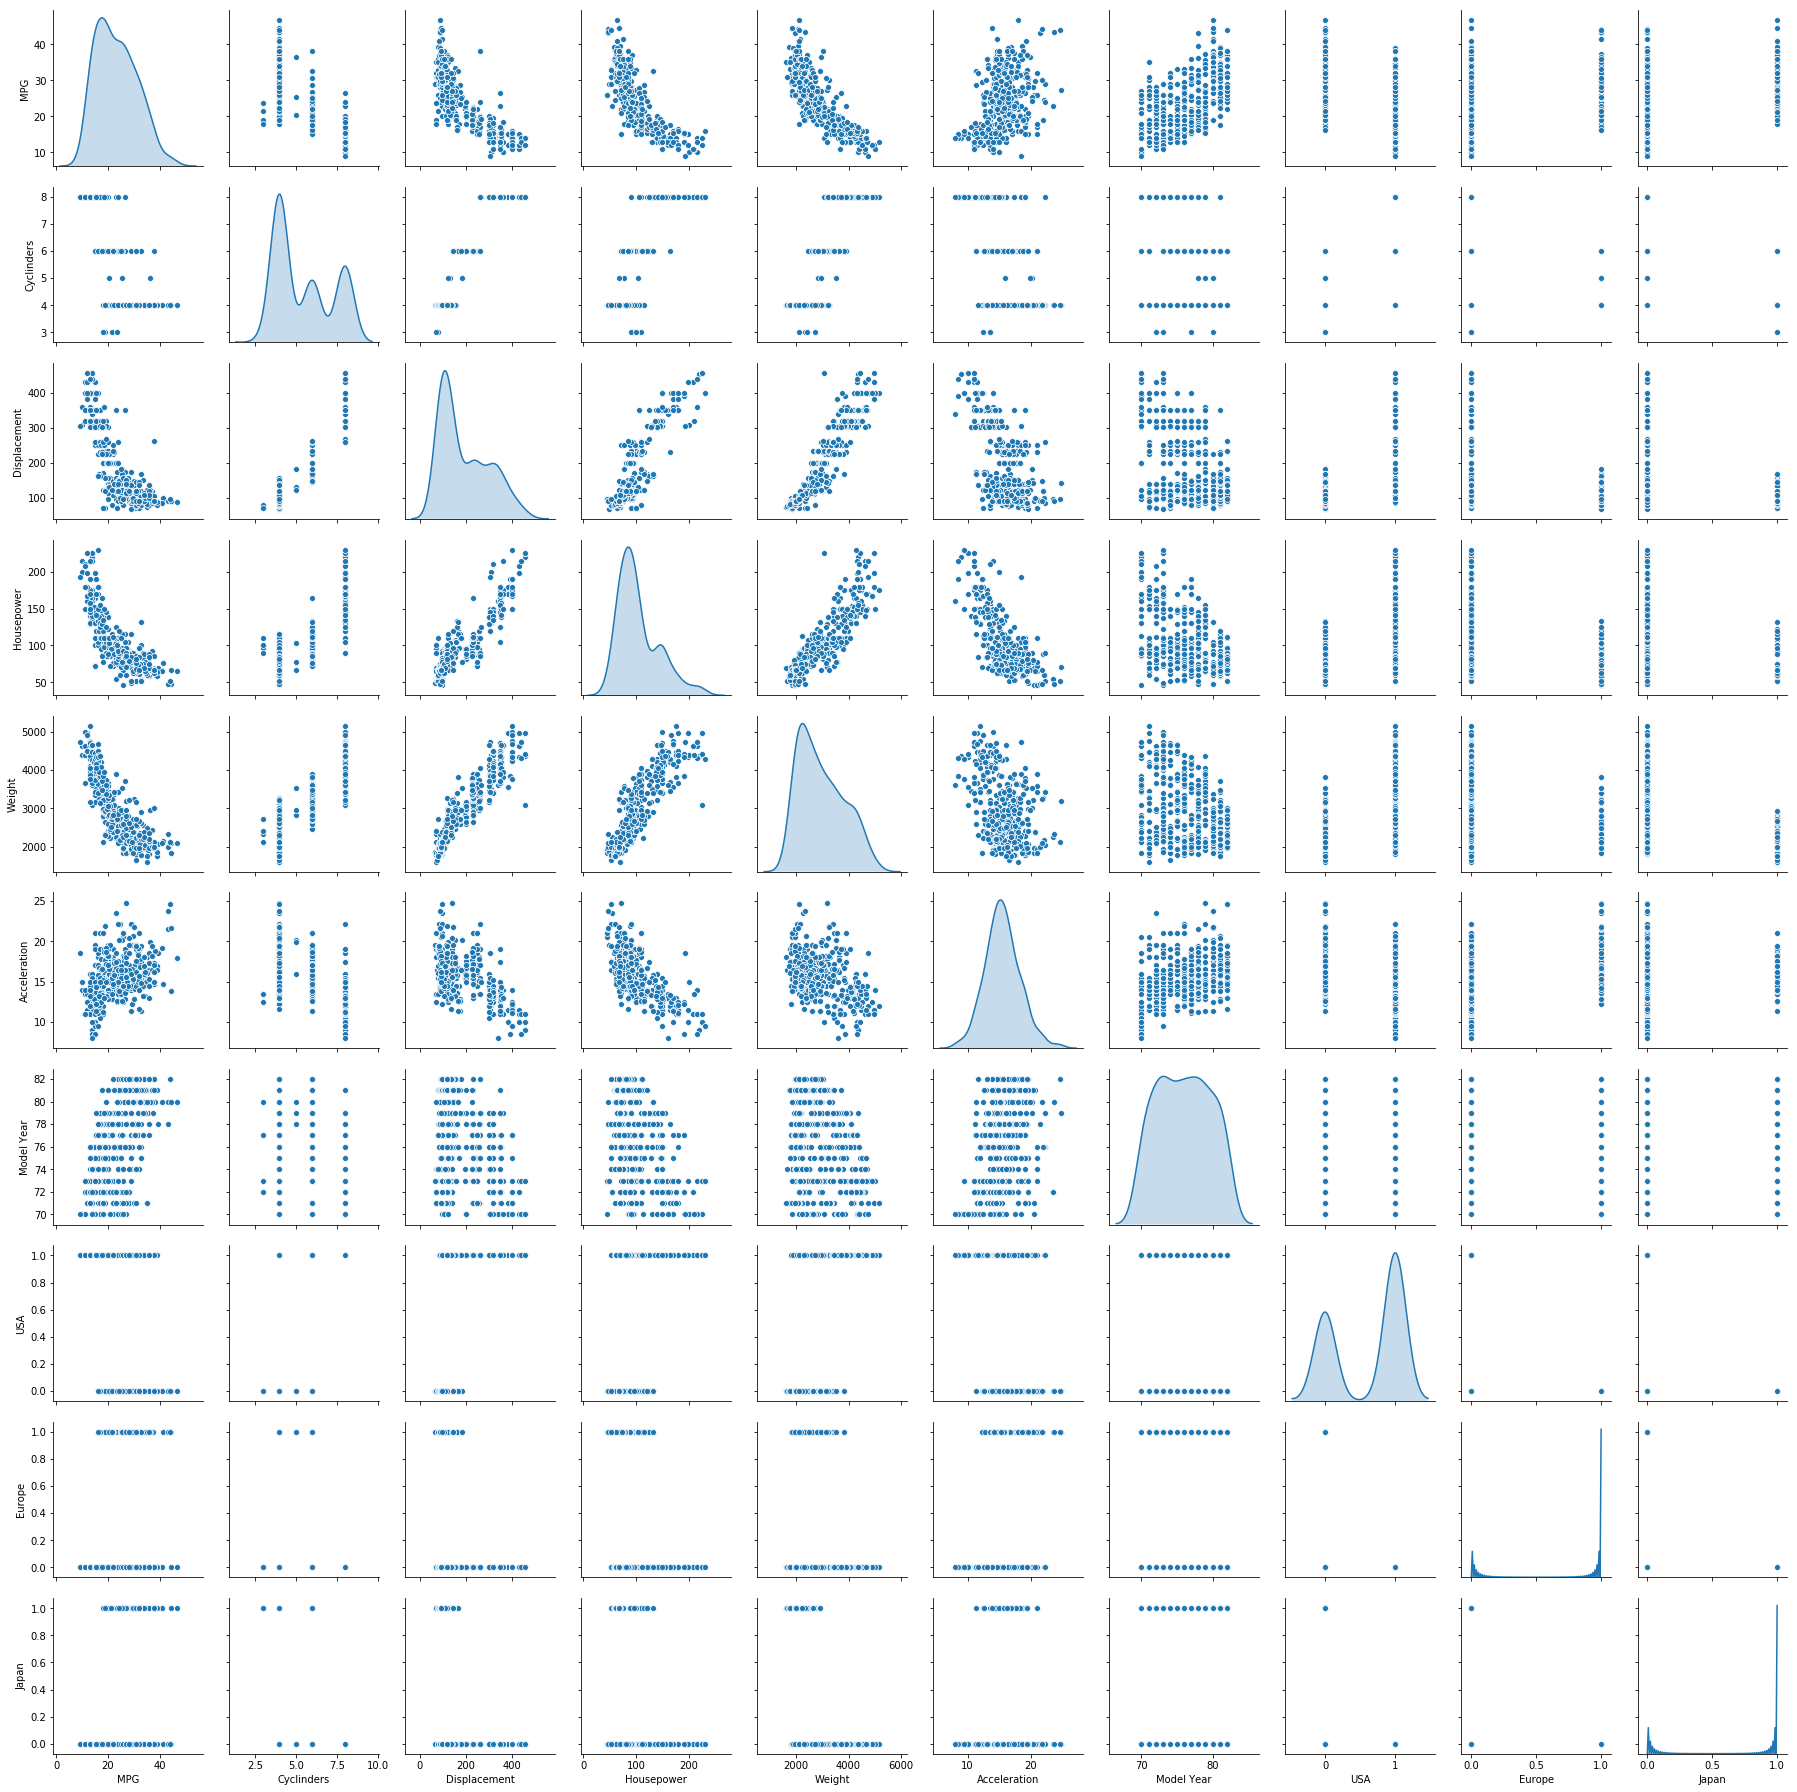

In [57]:
g = sns.pairplot(dataset, diag_kind='kde')

In [59]:
class Network(keras.Model):
    
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)
        
    def call(self, inputs, training=None, mask='None'):
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)
        
        return x

In [61]:
model = Network()
model.build(input_shape=(4, 9))
model.summary()

Model: "network_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              multiple                  640       
_________________________________________________________________
dense_4 (Dense)              multiple                  4160      
_________________________________________________________________
dense_5 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [62]:
optimizer = keras.optimizers.RMSprop(0.001)

<bound method DatasetV2.batch of <BatchDataset shapes: ((None, 9), (None,)), types: (tf.float64, tf.float64)>>

In [83]:
from IPython.display import clear_output

199 0 44.03434753417969


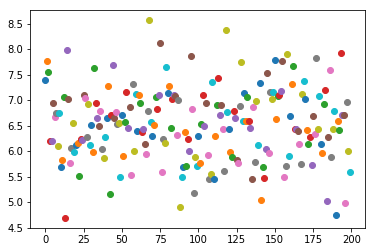

In [84]:

for epoch in range(200):
    for step, (x, y) in enumerate(train_db):
        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(tf.losses.MSE(y, out))
            mae_loss = tf.reduce_mean(tf.losses.MAE(y, out))
            
            if step % 10 == 0:
                
                print(epoch, step, float(loss))
                plt.plot(epoch, mae_loss, 'o')
            if step % 105 == 0
            
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))